In [5]:
import pandas as pd
#sets up firearm seizures sheet and checks to make sure it imported properly
seizures = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
seizures.head()

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [6]:
#counts the total number of seizures in each neighborhood. does not give weight to number of guns collected in each seizure
total_seizures_series = seizures.groupby("neighborhood").count().loc[:,"total_count"].sort_values(ascending=False)
total_seizures_series[:15]

neighborhood
Homewood South               252
South Side Flats             180
Homewood North               130
Carrick                      117
Hazelwood                    112
Central Business District    112
Perry South                  112
East Hills                   109
Sheraden                     108
Marshall-Shadeland           108
Larimer                      107
Lincoln-Lemington-Belmar     103
Knoxville                     96
Middle Hill                   88
Brighton Heights              82
Name: total_count, dtype: int64

In [7]:
#counts the total number of guns seized in each neighborhood
total_guns_series = seizures.groupby("neighborhood")["total_count"].sum().sort_values(ascending=False)
total_guns_series[:15]

neighborhood
Homewood South               345
South Side Flats             208
Homewood North               159
Brighton Heights             149
Marshall-Shadeland           148
Carrick                      148
East Liberty                 148
Hazelwood                    144
East Hills                   137
Lincoln-Lemington-Belmar     136
Perry South                  136
Larimer                      126
Central Business District    125
Sheraden                     121
Knoxville                    119
Name: total_count, dtype: int64

<Axes: xlabel='neighborhood'>

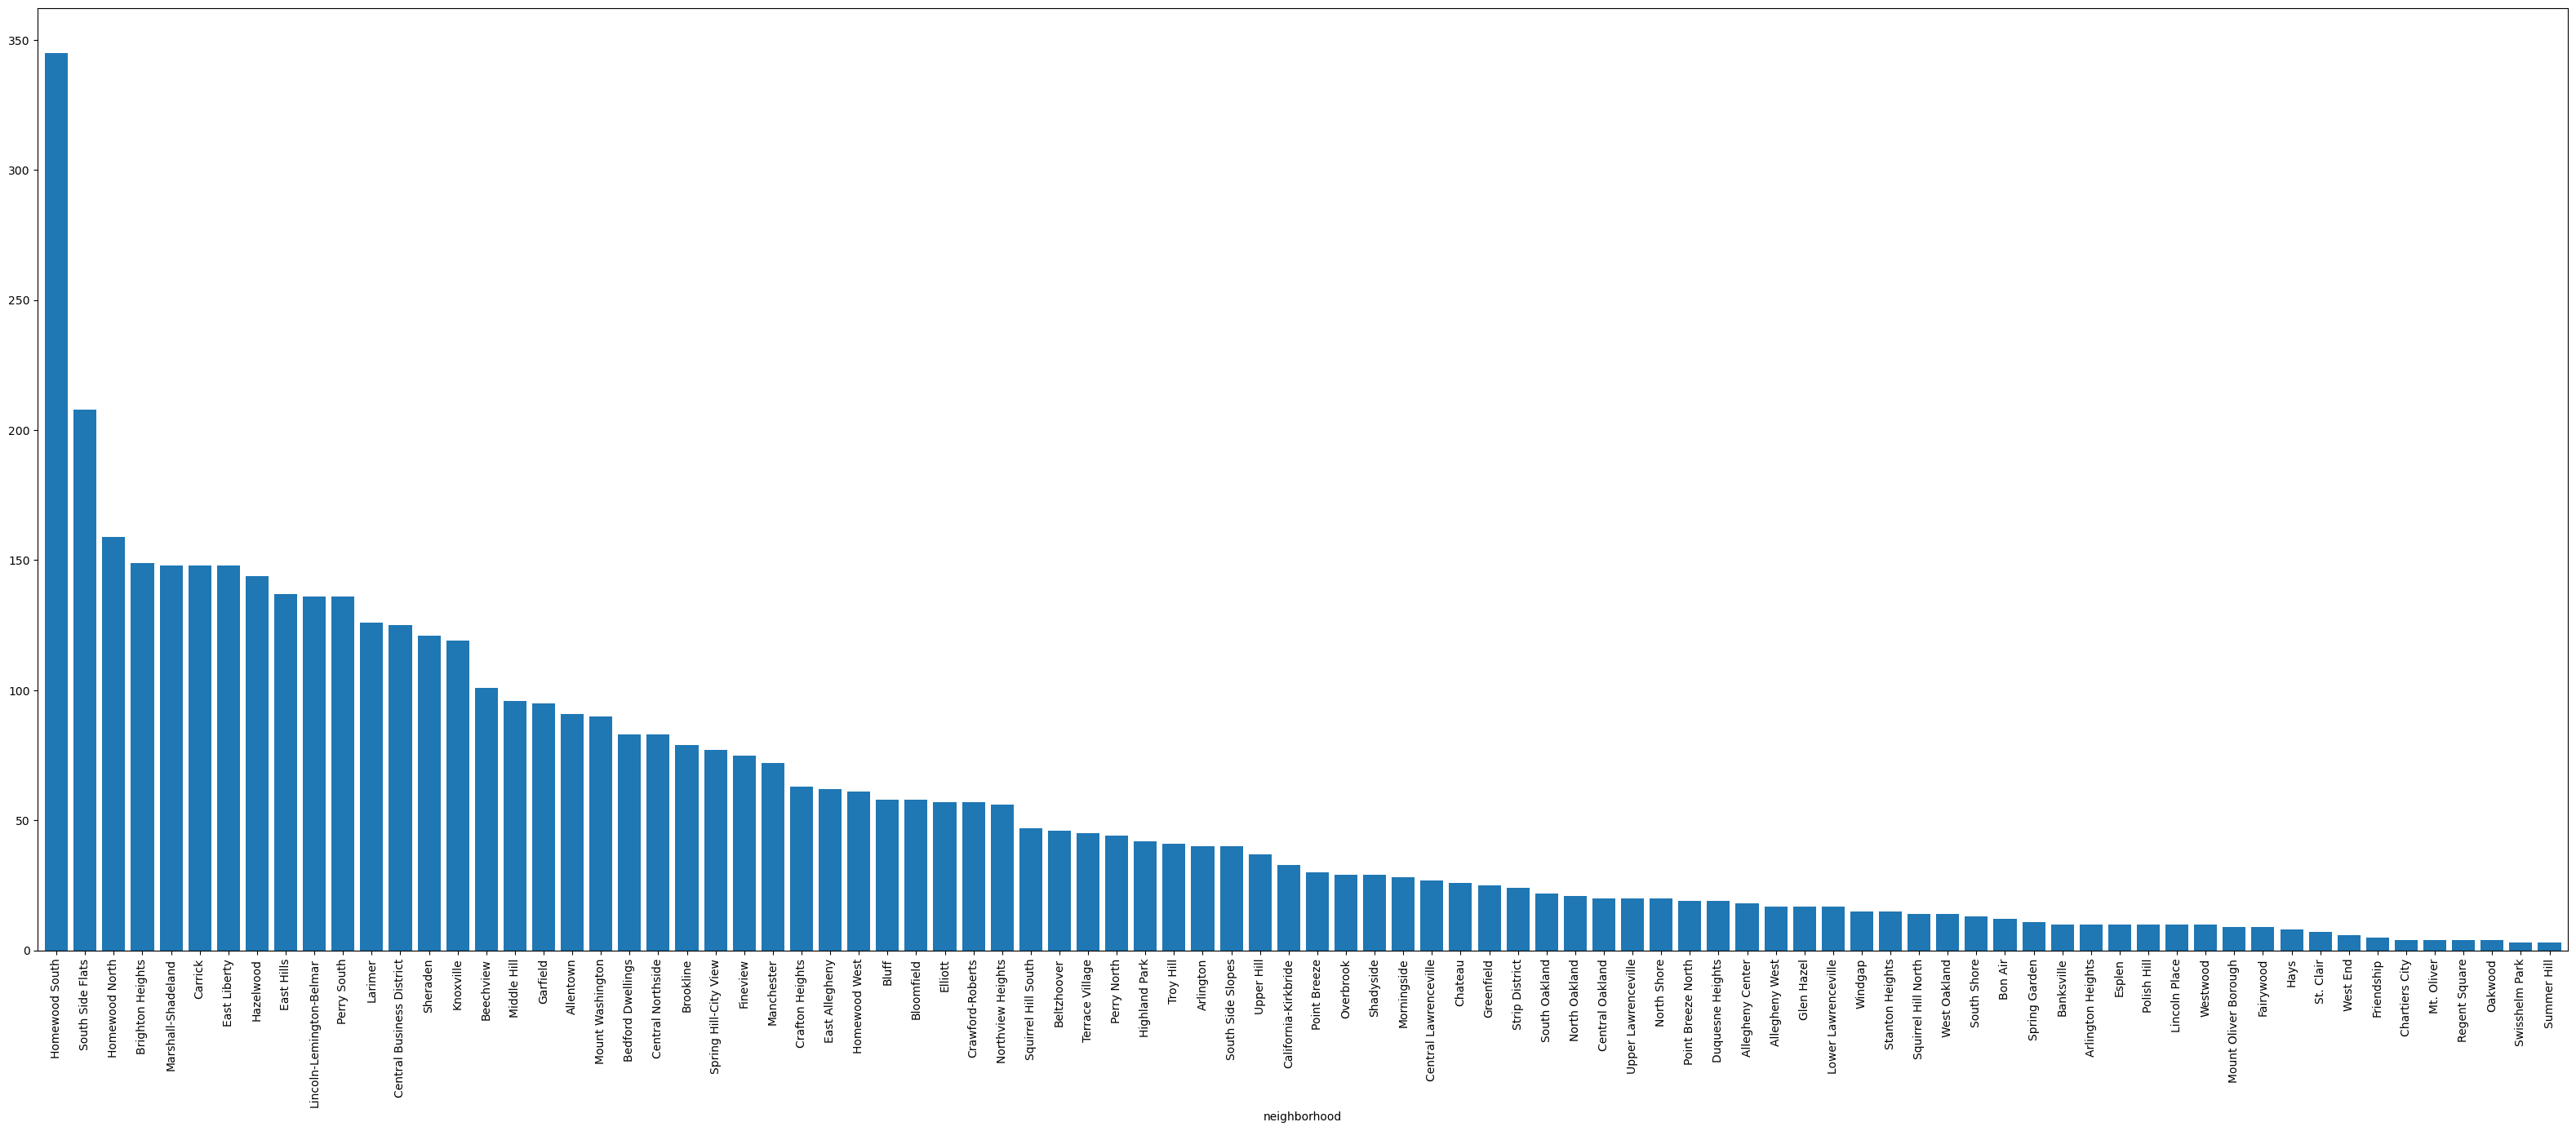

In [8]:
#plots the total guns seized per neighborhood from most to least
total_guns_series.plot(kind="bar", width = .8, figsize = (40,15))

<Axes: xlabel='neighborhood'>

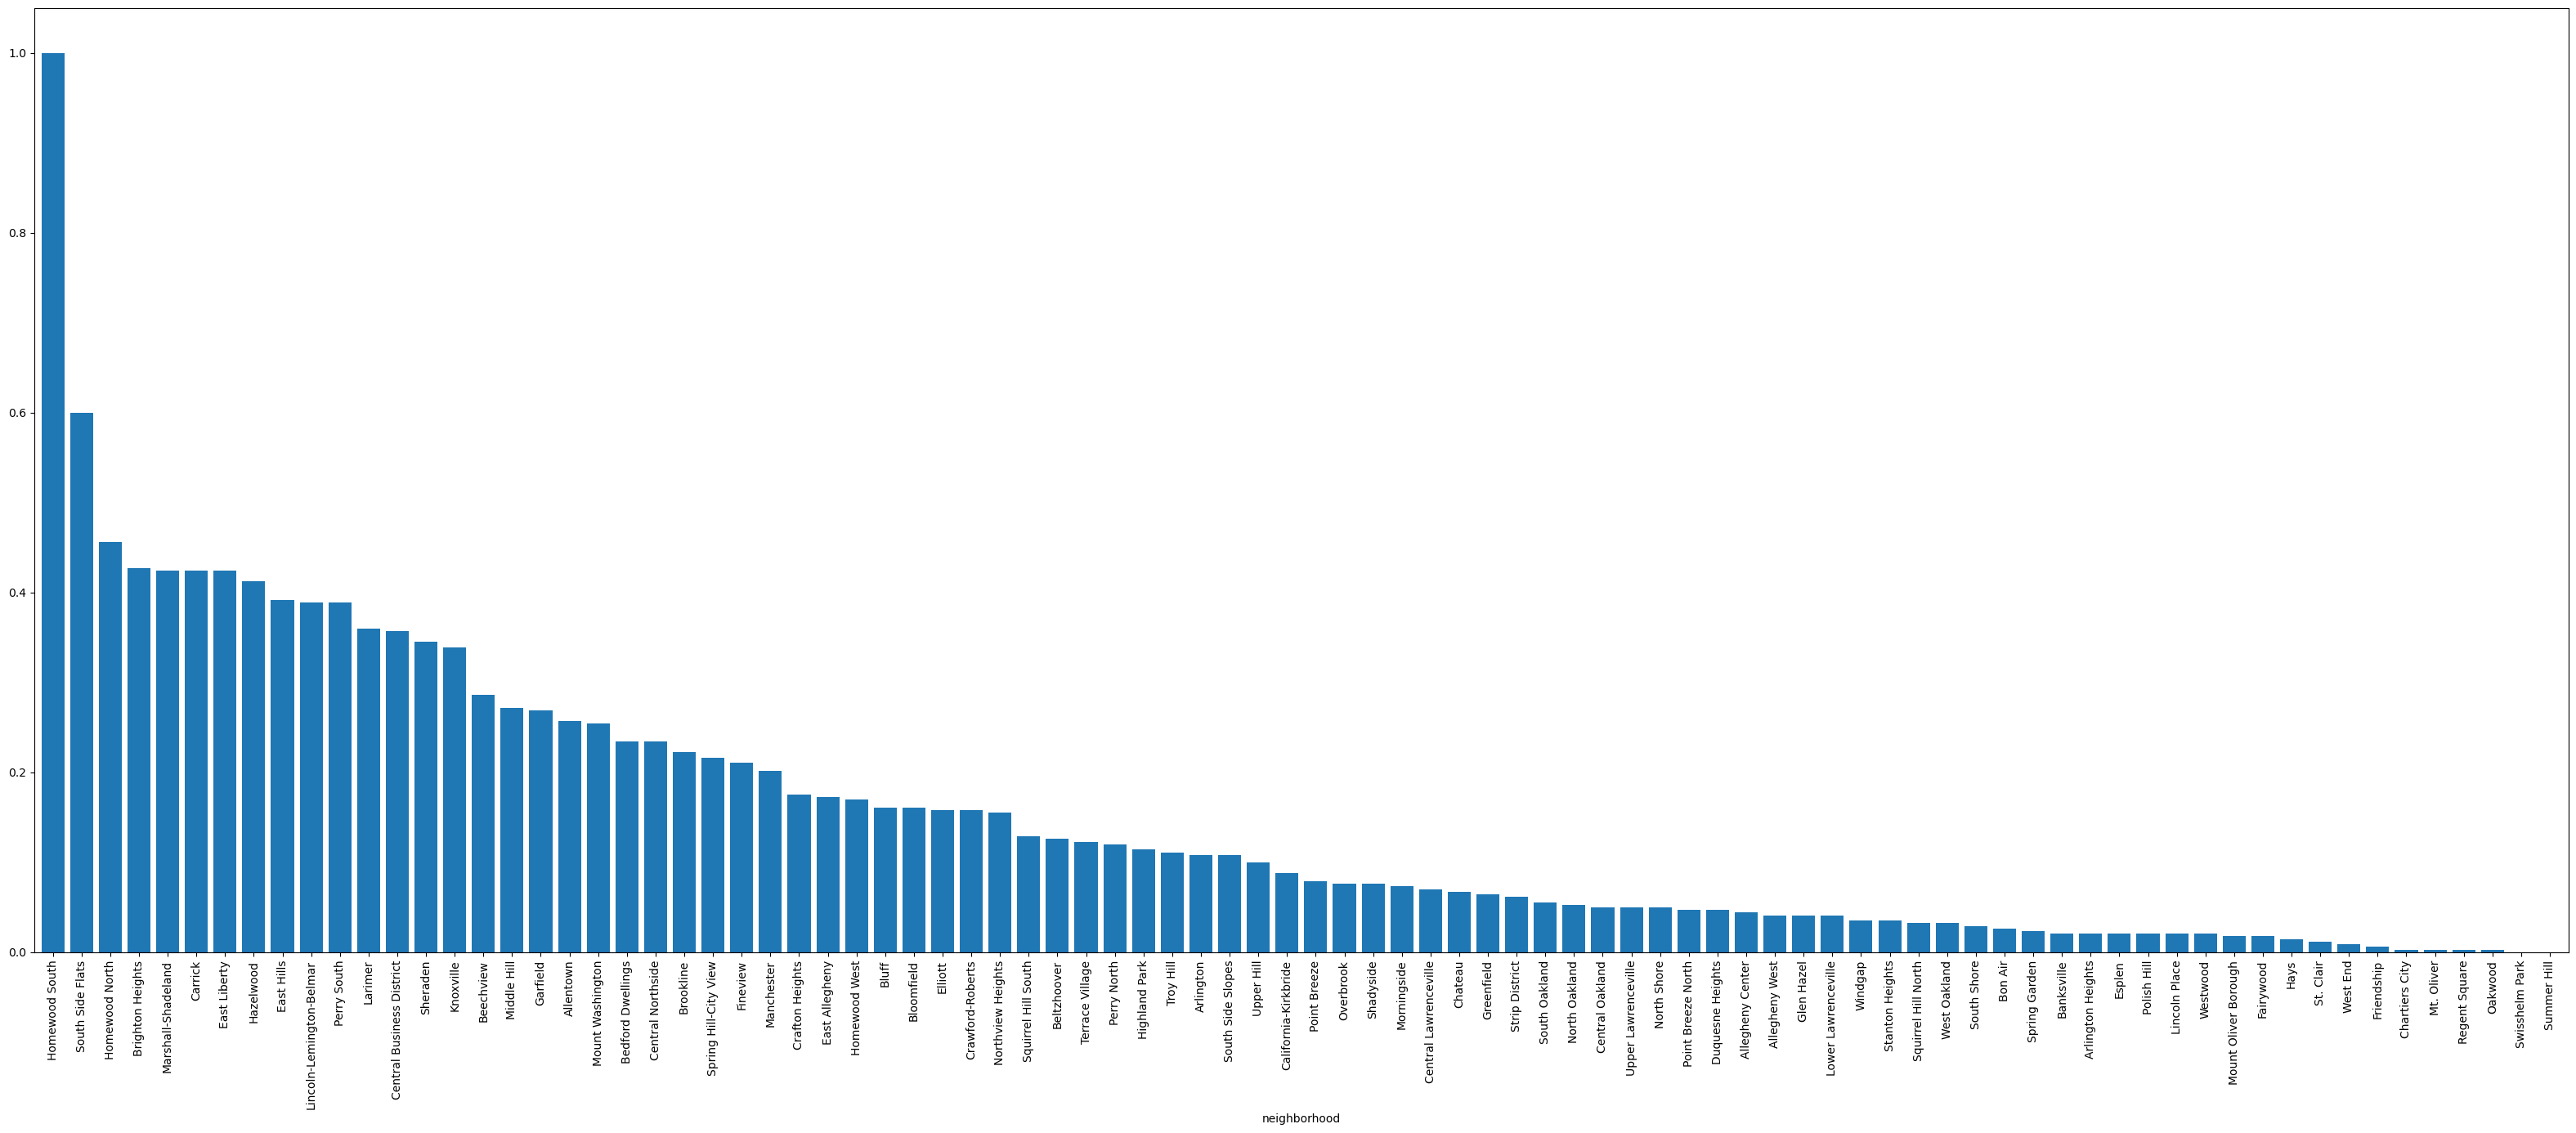

In [9]:
#plots the normalized total guns seized per neighborhood from most to least
normal_total_guns_series = (total_guns_series - total_guns_series.min()) / (total_guns_series.max() - total_guns_series.min())
normal_total_guns_series.plot(kind="bar", width = .8, figsize = (40,15))

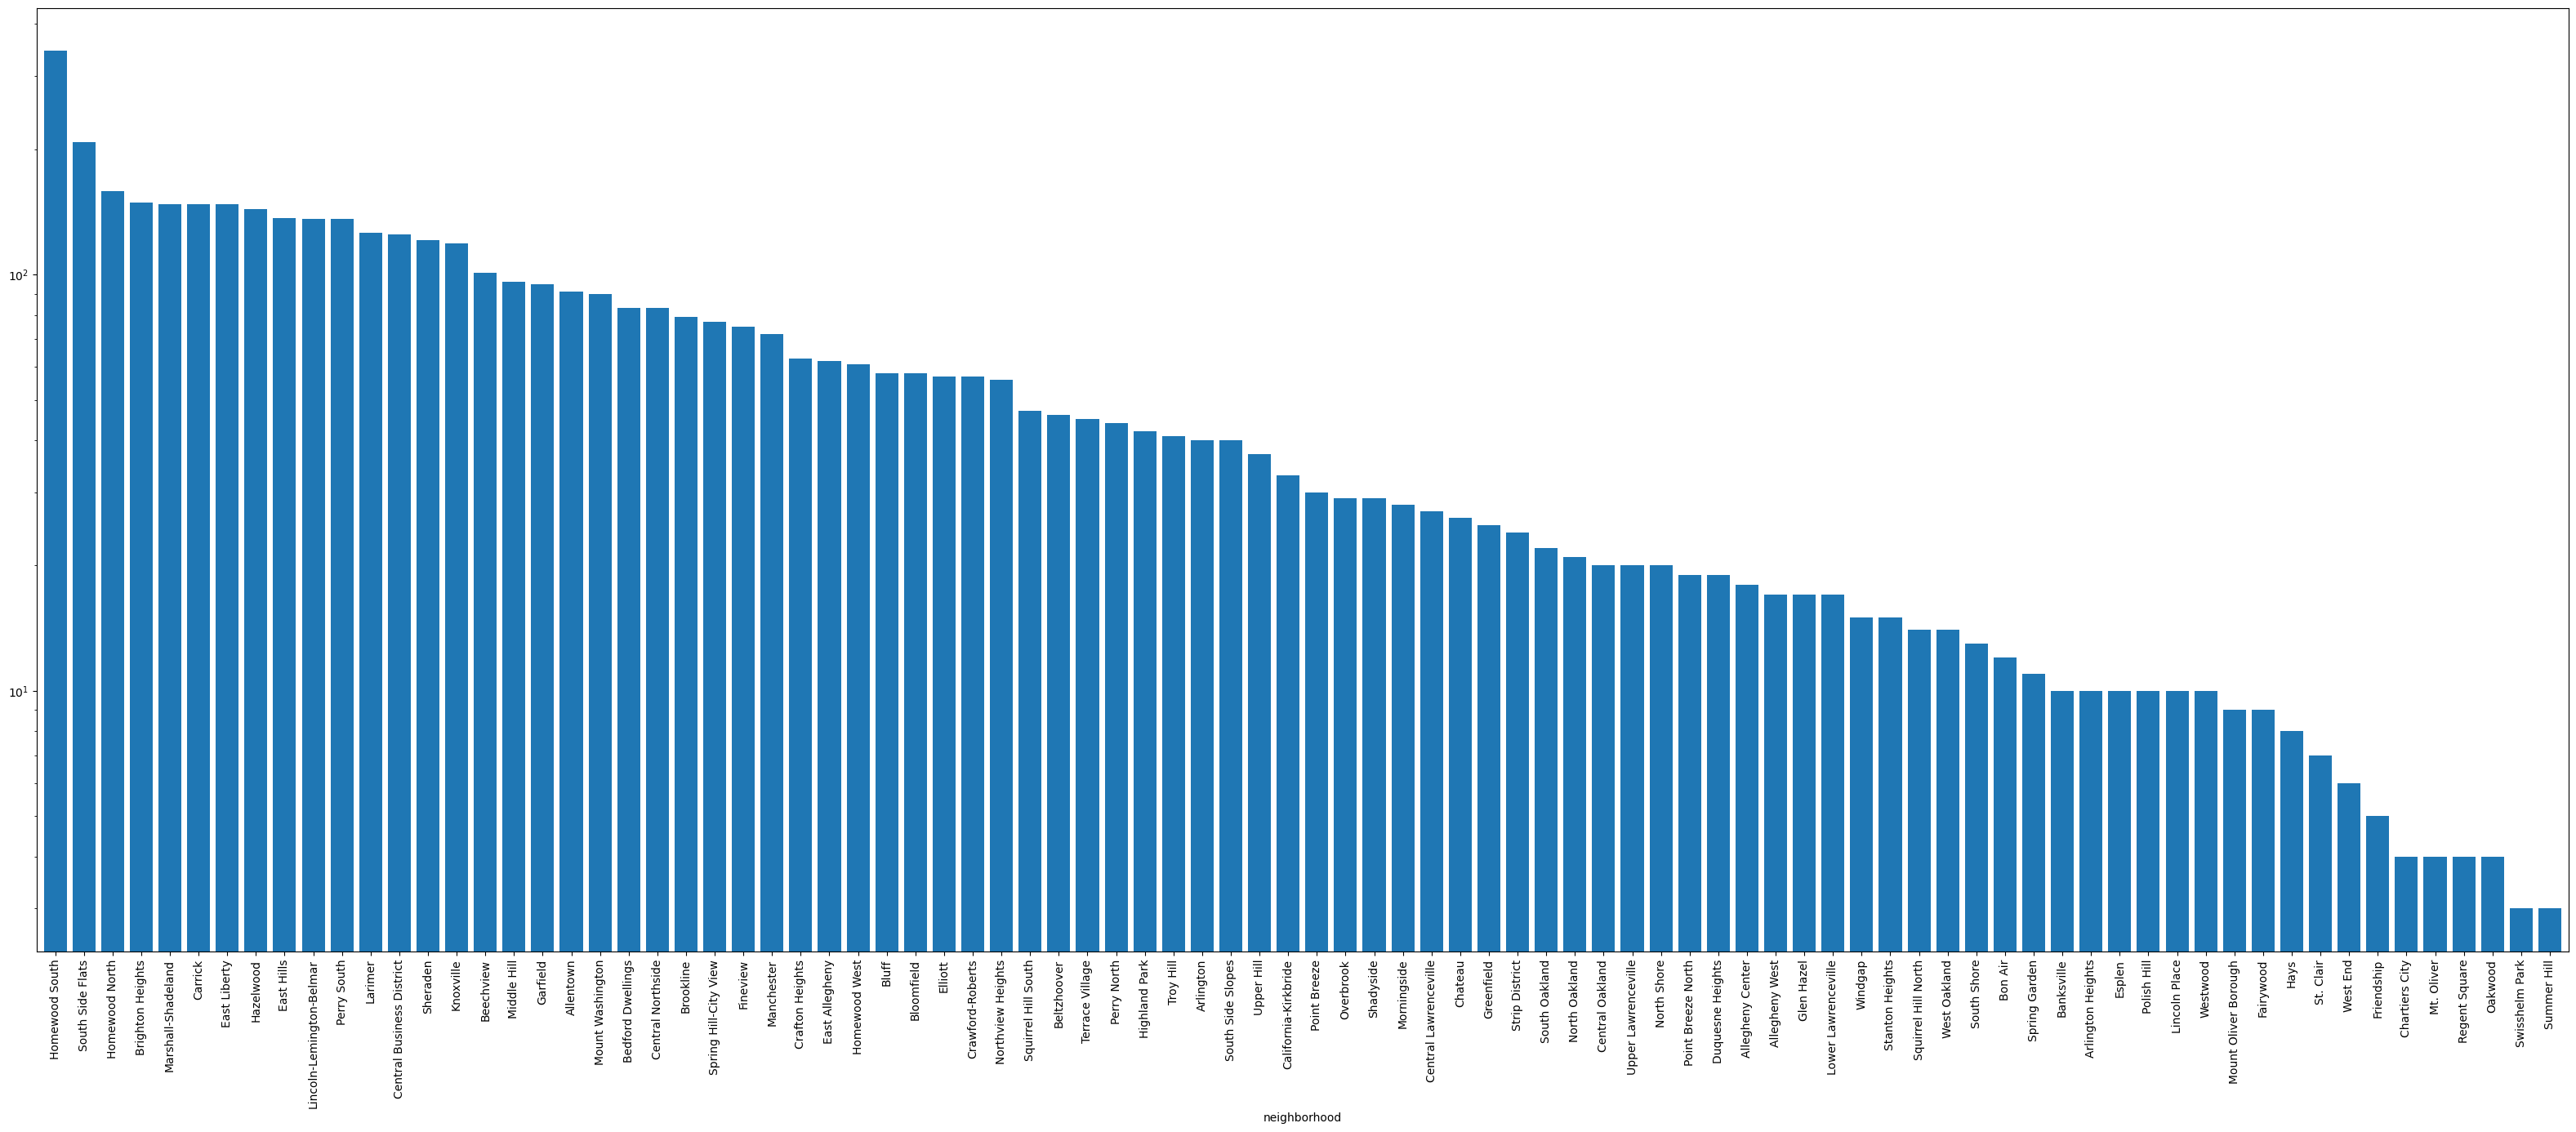

In [10]:
#plots the total guns seized per neighborhood from most to least. the y axis is scaled to a log function to better show off the smaller values in the dataset
ax = total_guns_series.plot(kind="bar", width = .8, figsize = (40,15))
ax.set_yscale("log")

<Axes: xlabel='neighborhood'>

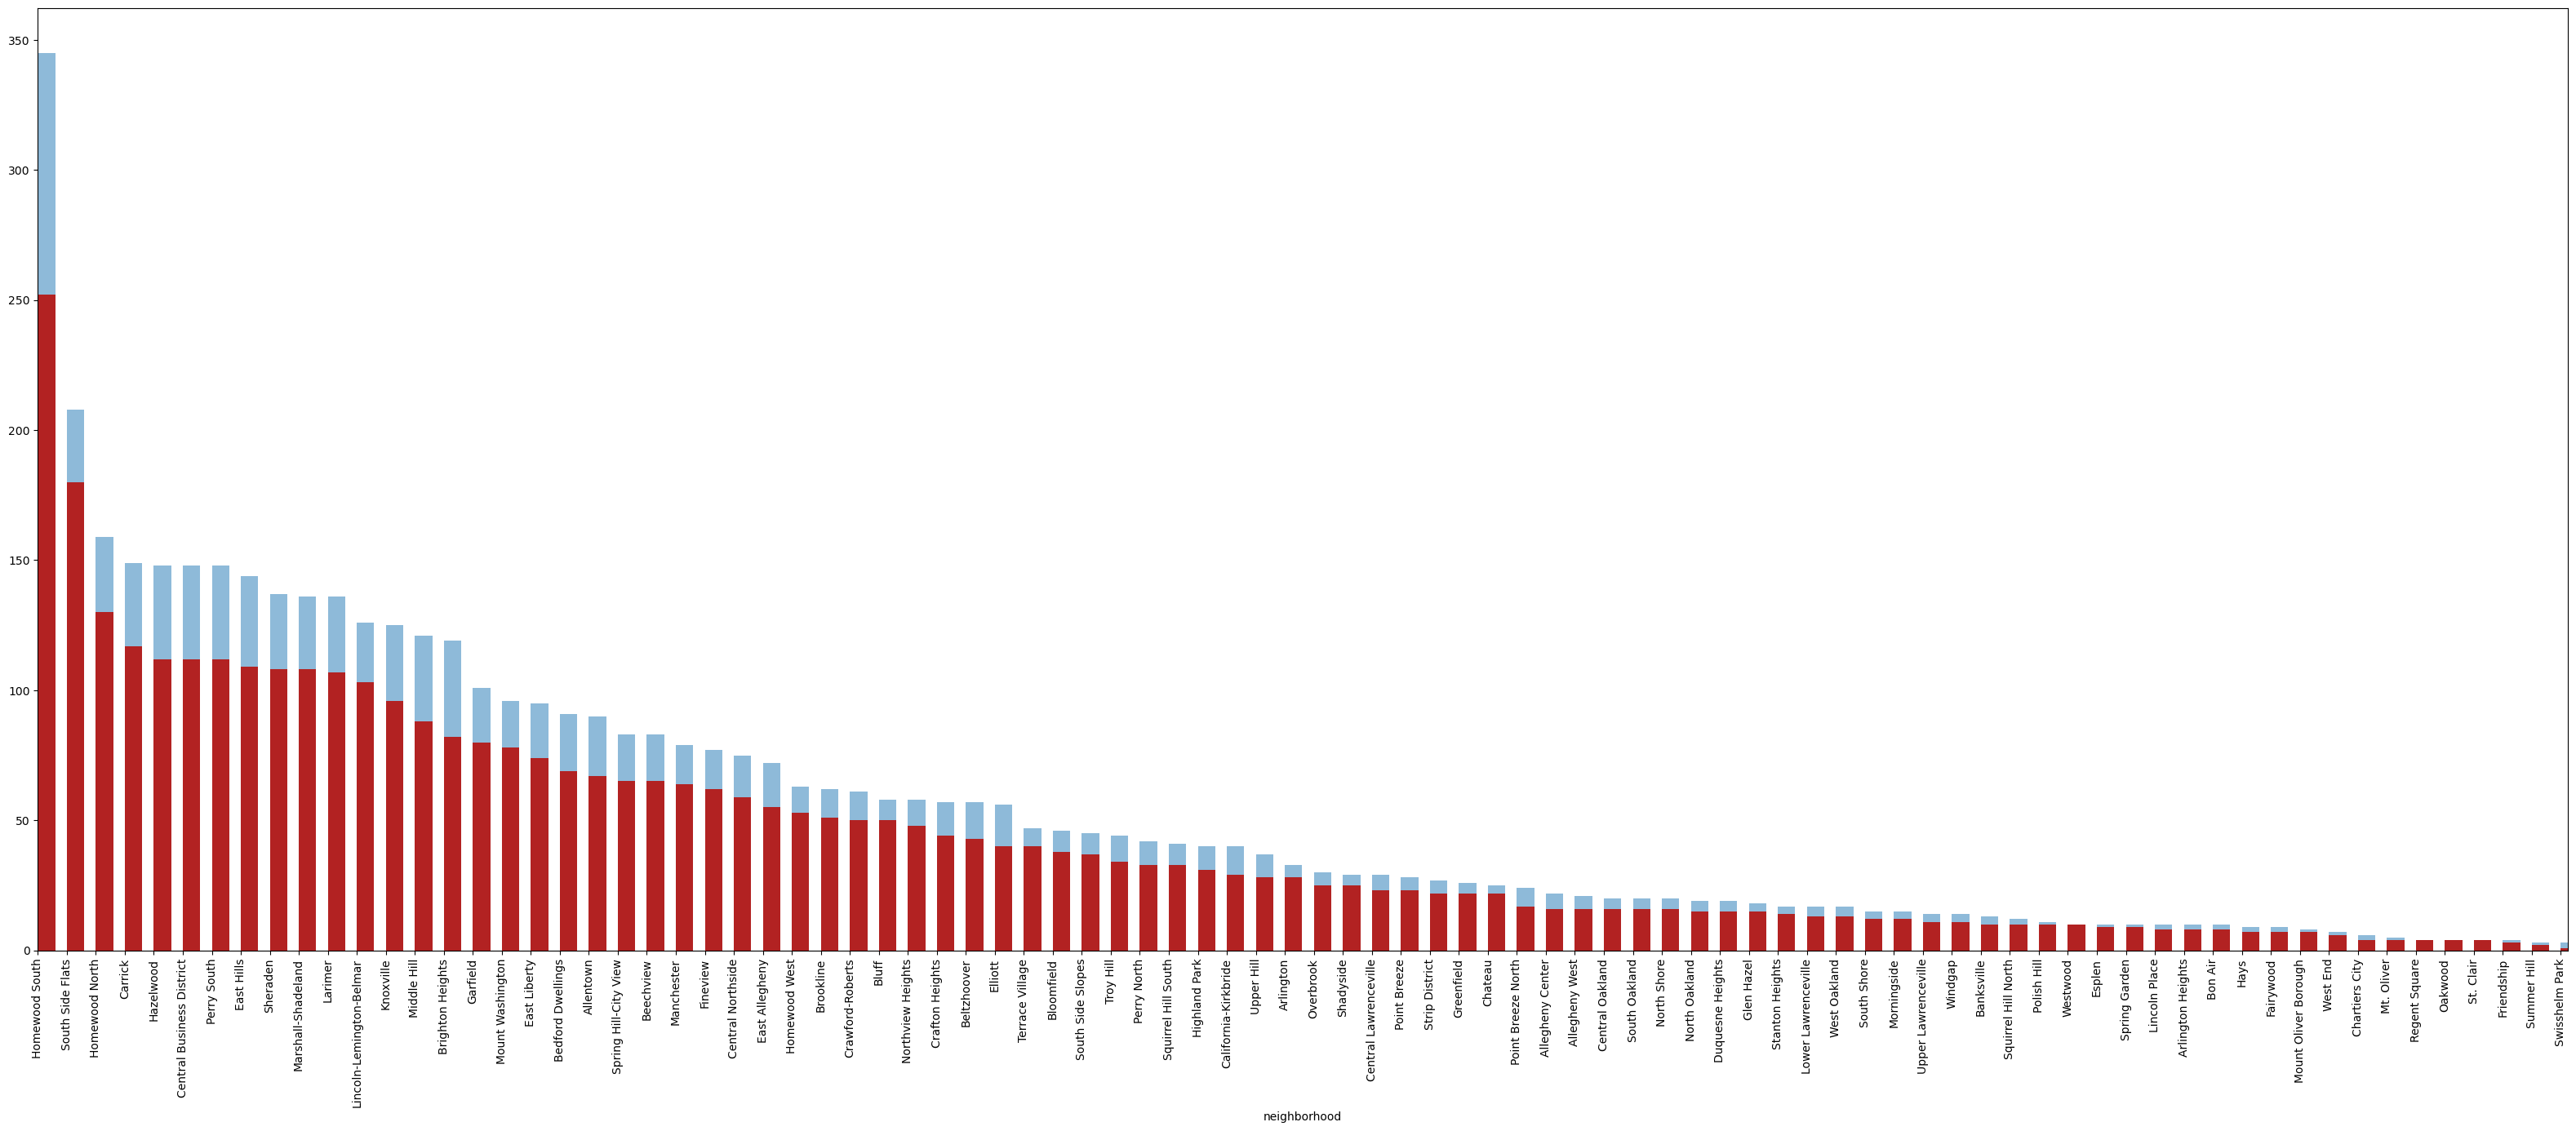

In [46]:
#plots the total guns seized per neighborhood (blue) against the total seizures per neighborhood (red). still sorted from most to least
total_guns_series.plot(kind="bar", width = .6, figsize = (40,15), alpha = .5, position = 0)
total_seizures_series.plot(kind="bar", width = -.6, color = "firebrick", position = 1)

<Axes: xlabel='neighborhood'>

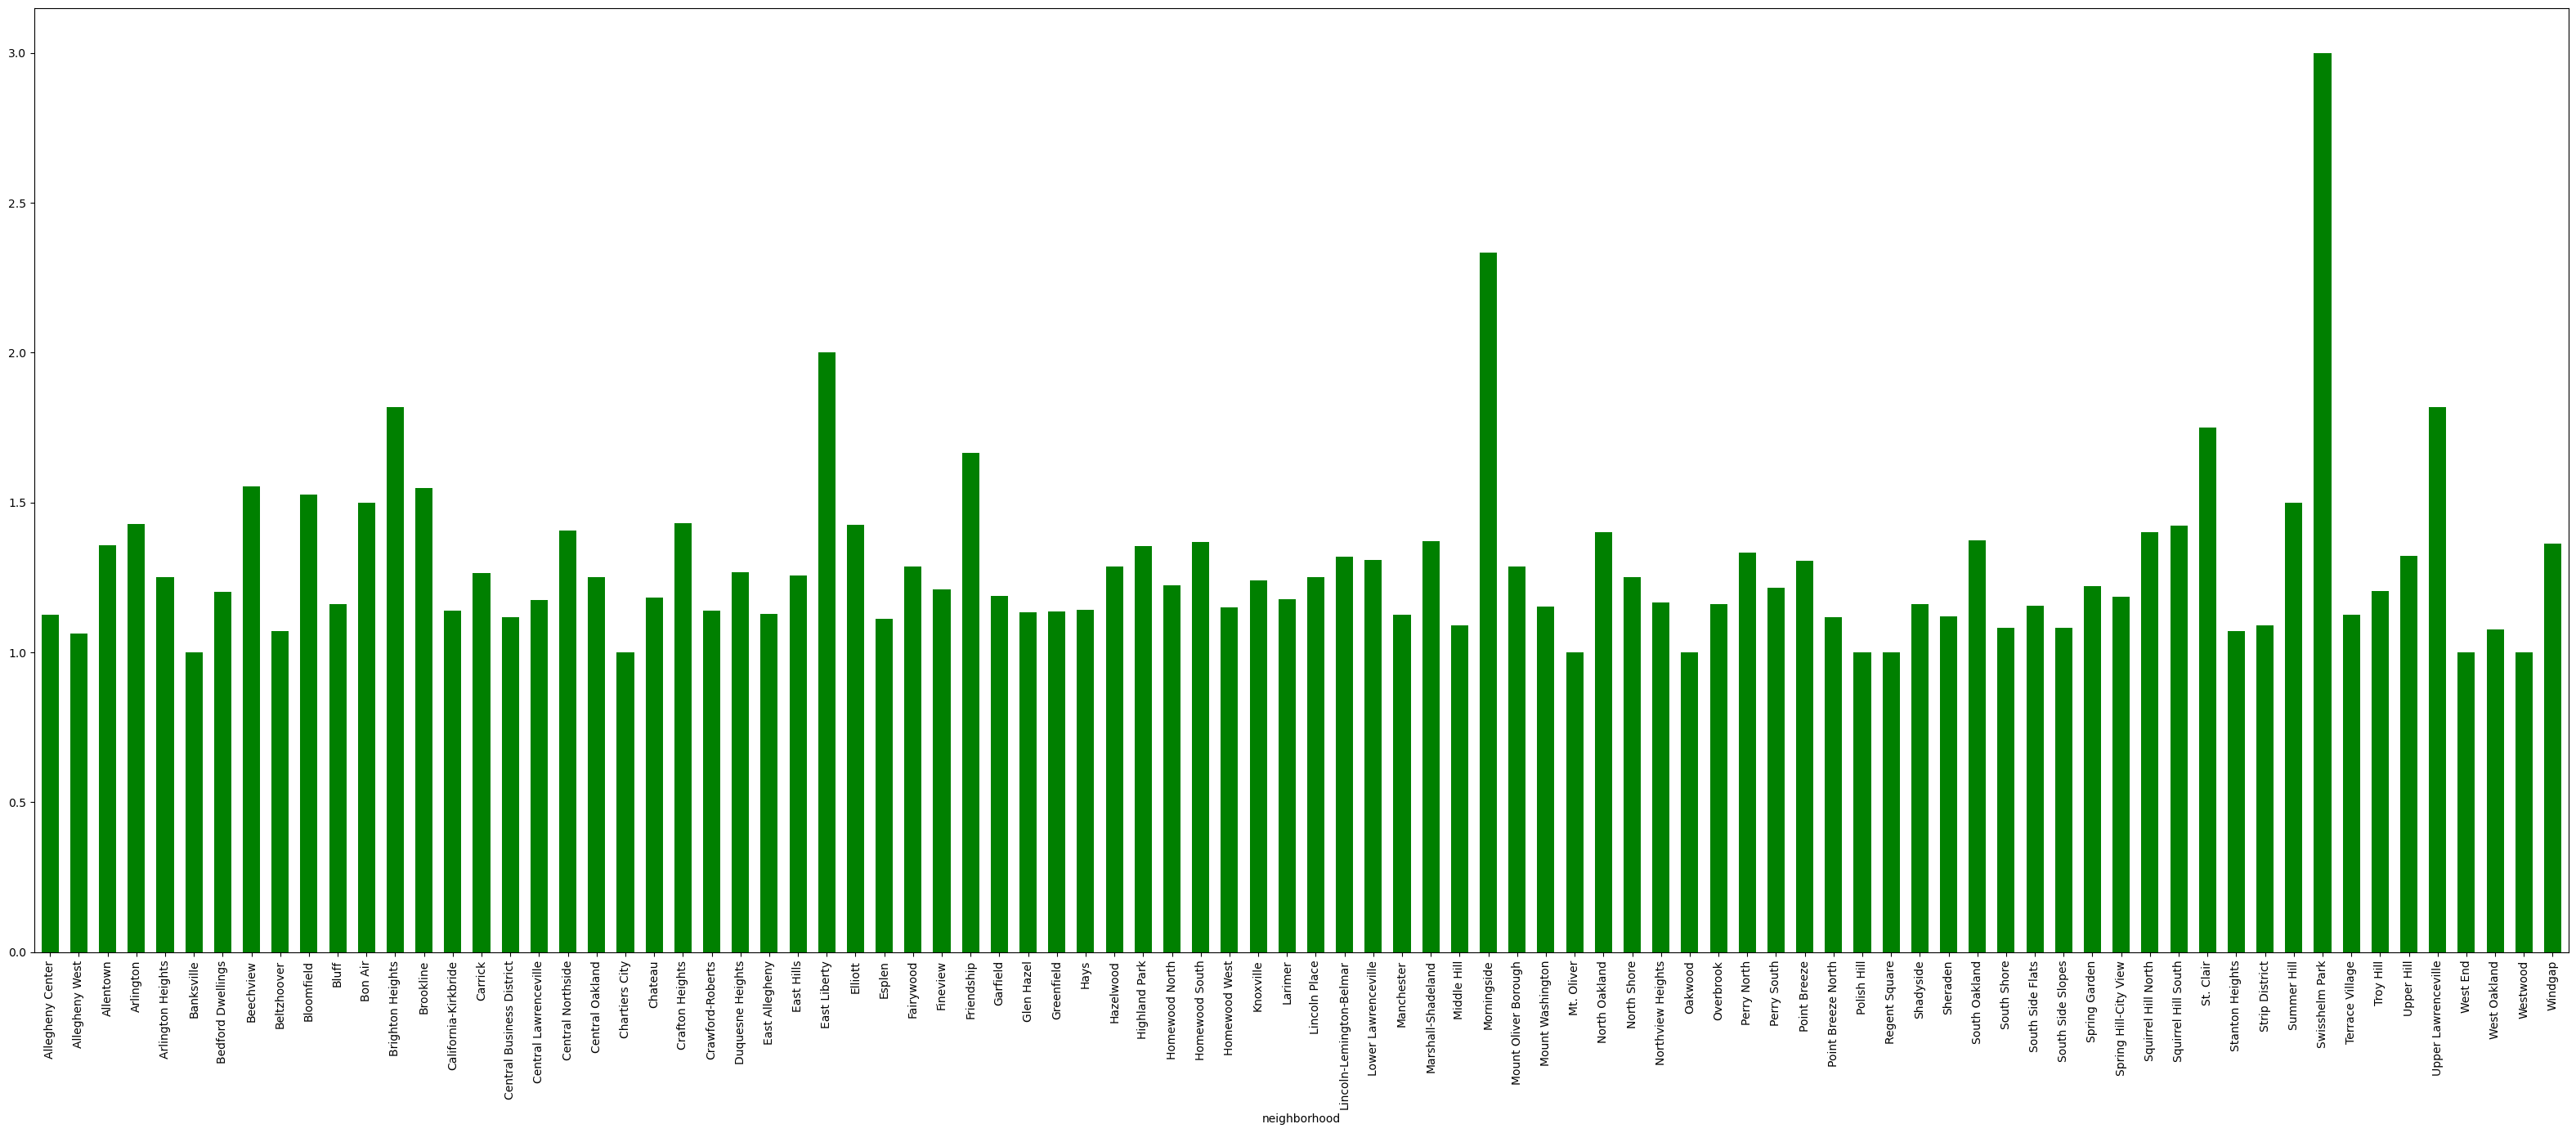

In [66]:
#plots the total guns seized per neighborhood/the total seizures per neighborhood to demonstrate the difference. still sorted from most to least
diff_series = total_guns_series/total_seizures_series #alphabetical order
diff_series.plot(kind="bar", width = .6, color = "green", figsize = (40,15))

<Axes: xlabel='neighborhood'>

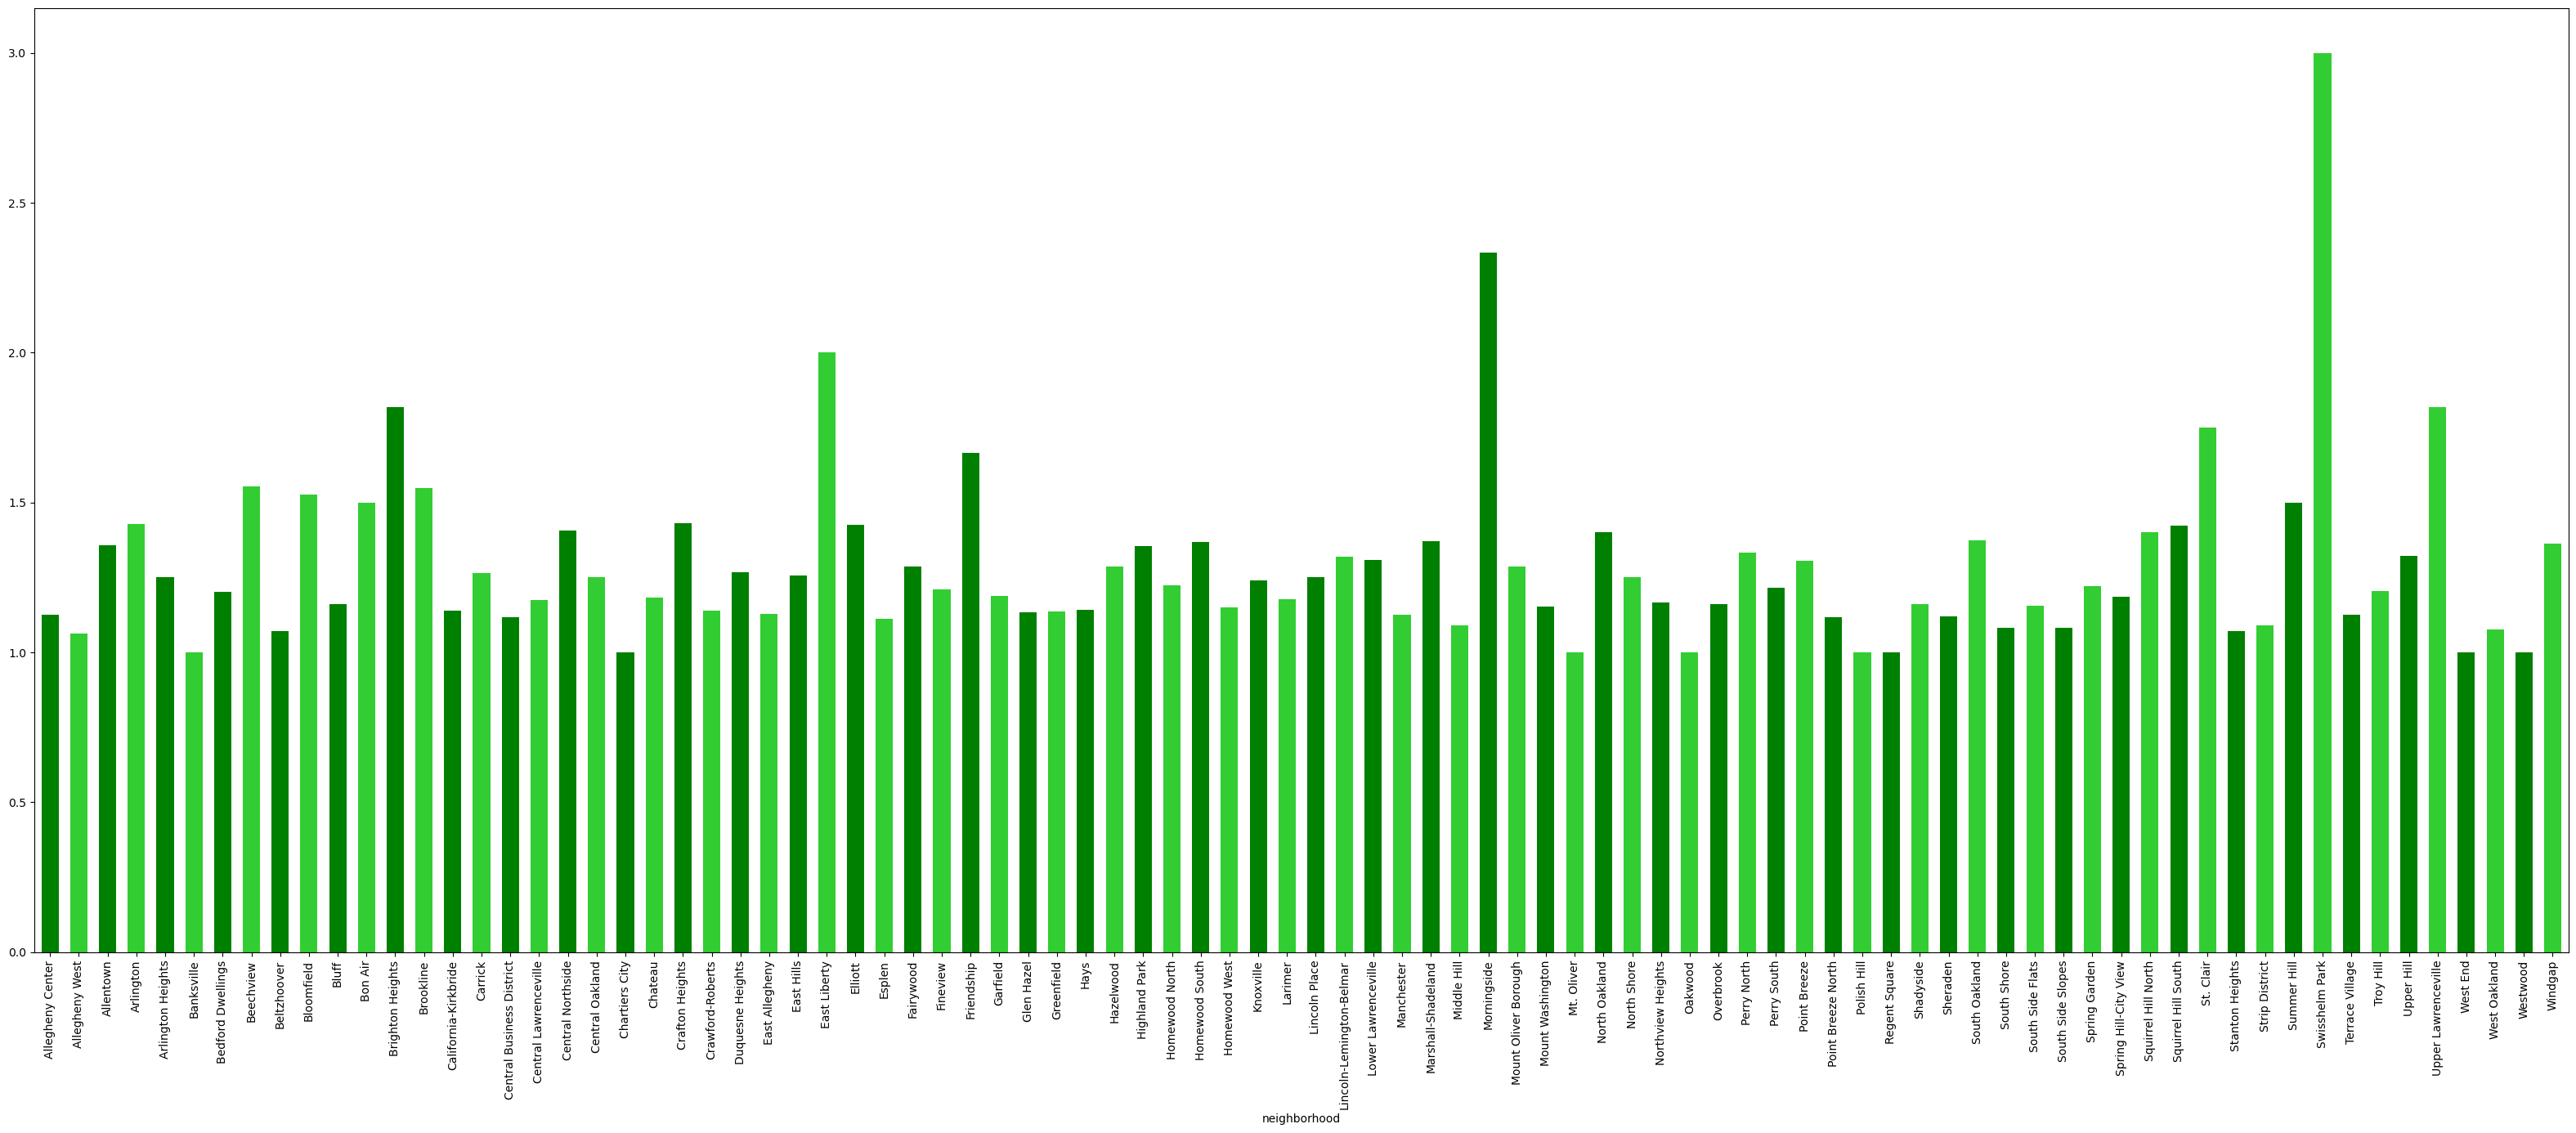

In [69]:
#same as above, just with alternating colors for better visibility
colors = ["green", "limegreen"] * (len(diff_series) // 2 + 1)
diff_series.plot(kind="bar", width = .6, color = colors[:len(diff_series)], figsize = (40,15))